#  Introduction to Machine Learning Dataset by Omokaro Loveth

# (1)

In [27]:
A = [1,2,3,4,5,6]
B = [13, 21, 34]

In [28]:
#adding A list and B list together
A.extend(B)

In [29]:
print(A)

[1, 2, 3, 4, 5, 6, 13, 21, 34]


# (2)

In [30]:
#how to get identity matrix

np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [31]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

# (3)

In [ ]:
#Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the data 
#df = pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv')

In [4]:
#Reading the data 
df = pd.read_csv('fuel_data.csv')

In [5]:
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [7]:
#to get the lowest average fuel cost per unit burned
df.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean()


fuel_type_code_pudl
coal         67.421830
gas          13.659397
nuclear    4955.157002
oil         168.877086
other        18.253856
waste        19.518122
Name: fuel_cost_per_unit_burned, dtype: float64

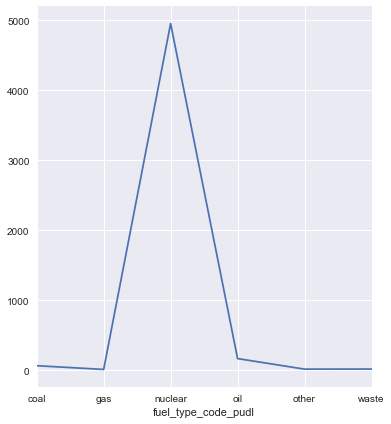

In [9]:
#this can also be represented graphically

plt.clf()
df.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean().plot(kind='line', figsize=(6,7))
plt.show()

 gas has the lowest average fuel cost per unit burned at 13.659397

# (4)

In [10]:
#To get the summary of the statistics for the dataframe
df.describe().round(2)

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.00,29523.00,2.952300e+04,29523.00,29523.00,29523.00,29523.00
mean,118.60,2005.81,2.622119e+06,8.49,208.65,917.57,19.30
std,74.18,7.03,9.118004e+06,10.60,2854.49,68775.93,2091.54
min,1.00,1994.00,1.000000e+00,0.00,-276.08,-874.94,-41.50
25%,55.00,2000.00,1.381700e+04,1.02,5.21,3.78,1.94
50%,122.00,2006.00,2.533220e+05,5.76,26.00,17.37,4.13
75%,176.00,2012.00,1.424034e+06,17.01,47.11,42.14,7.74
max,514.00,2018.00,5.558942e+08,341.26,139358.00,7964521.00,359278.00


the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) is 10.60 and 17.01

# (5)

In [11]:
#to find the skewness in fuel_qty_burned
df.skew().round(2)

utility_id_ferc1                  0.61
report_year                       0.01
fuel_qty_burned                  15.85
fuel_mmbtu_per_unit               4.14
fuel_cost_per_unit_burned        19.79
fuel_cost_per_unit_delivered    105.01
fuel_cost_per_mmbtu             171.68
dtype: float64

In [12]:
df.kurtosis().round(2)

utility_id_ferc1                    1.09
report_year                        -1.15
fuel_qty_burned                   651.37
fuel_mmbtu_per_unit                55.60
fuel_cost_per_unit_burned         485.26
fuel_cost_per_unit_delivered    11765.05
fuel_cost_per_mmbtu             29489.13
dtype: float64

the skewness and kurtosis for the fuel quantity burned is 15.85 and 651.37

# (6)

In [13]:
#To find if there is any missing value in the dataset
df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [14]:
#to find the percentage of the missing value
df.isnull().sum()*100/len(df)

record_id                       0.000000
utility_id_ferc1                0.000000
report_year                     0.000000
plant_name_ferc1                0.000000
fuel_type_code_pudl             0.000000
fuel_unit                       0.609694
fuel_qty_burned                 0.000000
fuel_mmbtu_per_unit             0.000000
fuel_cost_per_unit_burned       0.000000
fuel_cost_per_unit_delivered    0.000000
fuel_cost_per_mmbtu             0.000000
dtype: float64

Feature with missing value: fuel_unit, 
Total missing value: 180, 
Percent of missing values: 0.6097

# (7)

In [15]:
df['fuel_unit']

0        ton
1        ton
2        ton
3        ton
4        mcf
5        ton
6        kgU
7        ton
8        ton
9        ton
10       mcf
11       ton
12       mcf
13       ton
14       bbl
15       ton
16       ton
17       ton
18       ton
19       bbl
20       ton
21       bbl
22       ton
23       bbl
24       ton
25       bbl
26       ton
27       bbl
28       mcf
29       ton
        ... 
29493    mcf
29494    mcf
29495    bbl
29496    mcf
29497    mcf
29498    mcf
29499    bbl
29500    bbl
29501    ton
29502    bbl
29503    ton
29504    mcf
29505    bbl
29506    bbl
29507    bbl
29508    mcf
29509    mcf
29510    ton
29511    mcf
29512    mcf
29513    mcf
29514    bbl
29515    mcf
29516    ton
29517    ton
29518    mcf
29519    mcf
29520    mcf
29521    ton
29522    mcf
Name: fuel_unit, Length: 29523, dtype: object

The feature with missing values which is fuel_unit falls under the Categorical category.
The missing value imputation method used is the Modeimputation; replacing the misasing values with the most frequent value

# (8)

In [28]:
L= ['fuel_cost_per_unit_burned']
df.corr()['fuel_cost_per_unit_burned'].sort_values(ascending=False)

fuel_cost_per_unit_burned       1.000000
report_year                     0.013599
fuel_cost_per_unit_delivered    0.011007
fuel_cost_per_mmbtu            -0.000437
fuel_mmbtu_per_unit            -0.010034
fuel_qty_burned                -0.018535
utility_id_ferc1               -0.037863
Name: fuel_cost_per_unit_burned, dtype: float64

fuel_qty_burned has the second lowest correlation with fuel_cost_per_unit_burned
while fuel_mmbtu_per_unit has the third lowest correlation with fuel_cost_per_unit_burned

# (9)

In [50]:
df['report_year'].loc[1998]

1995

# (10)

In [94]:
df1 = df.groupby('report_year')['fuel_cost_per_unit_delivered']
df1.mean().sort_values(ascending=False)

report_year
1997    11140.197239
1996     9196.705948
2000      985.362877
2009      652.694163
2018      499.269966
2015      326.535511
1998      287.154420
2014      192.737183
2013      172.307591
2004      139.524275
2016      103.901761
2010       91.862105
1994       63.636060
2012       60.994502
2001       60.050396
2011       59.774667
2008       58.588197
2003       55.663493
2002       47.594361
2017       46.196861
2007       43.325023
2005       41.438184
2006       38.657484
1995       32.735269
1999       25.551627
Name: fuel_cost_per_unit_delivered, dtype: float64

1997 has the highest average fuel_cost_per_unit_delivered at 11140.197239